Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   S/N                                117 non-null    int64  
 1   Project                            107 non-null    object 
 2   Project Description                106 non-null    object 
 3   Project Type                       117 non-null    object 
 4   Preliminary Cost Estimate(=N=)     64 non-null     float64
 5   Preliminary Cost/m2                51 non-null     float64
 6   Initial Contract Sum               105 non-null    float64
 7   Actual Project Cost at Completion  117 non-null    float64
 8   Site Area(m2)                      85 non-null     float64
 9   Total Gross Floor Area(m2)         117 non-null    float64
 10  Total No. of Floors                116 non-null    float64
 11  Floor-to-floor height(m)           90 non-nu

C:\Users\ADV_enture\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


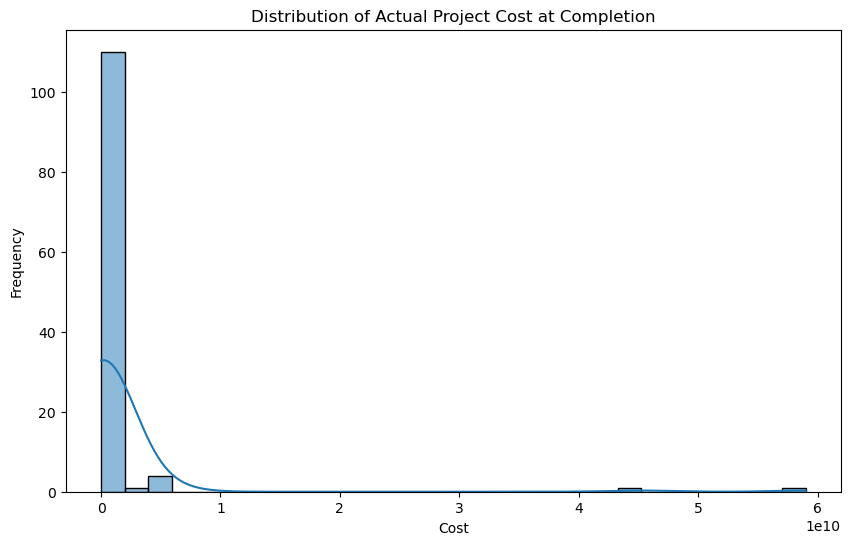

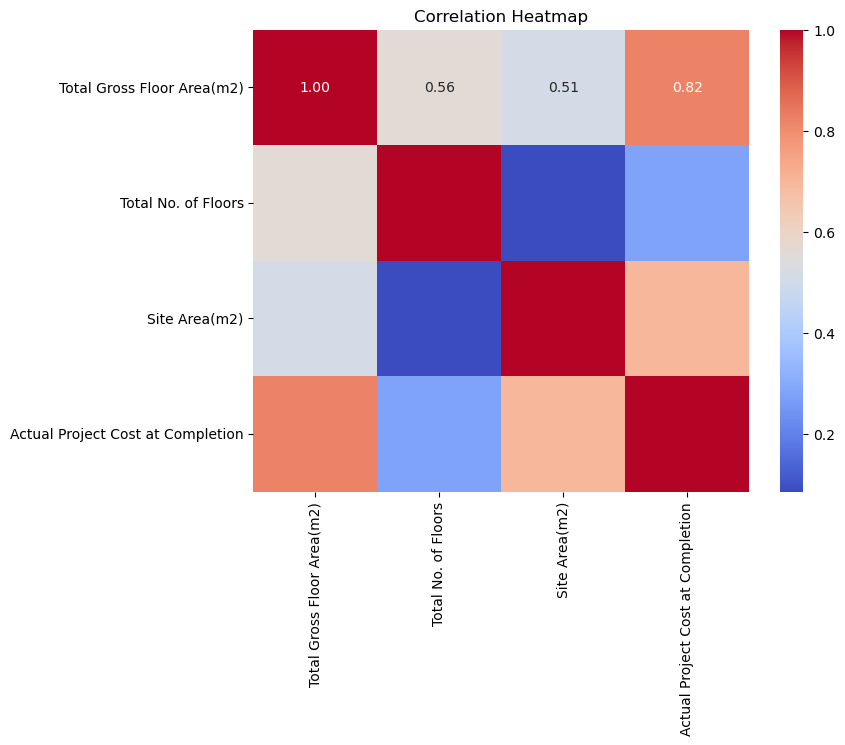

Linear Regression - MAE: 2211535795.0998874, MSE: 4.369440071303231e+19, RMSE: 6610174030.46488, R²: 0.6842230103662184


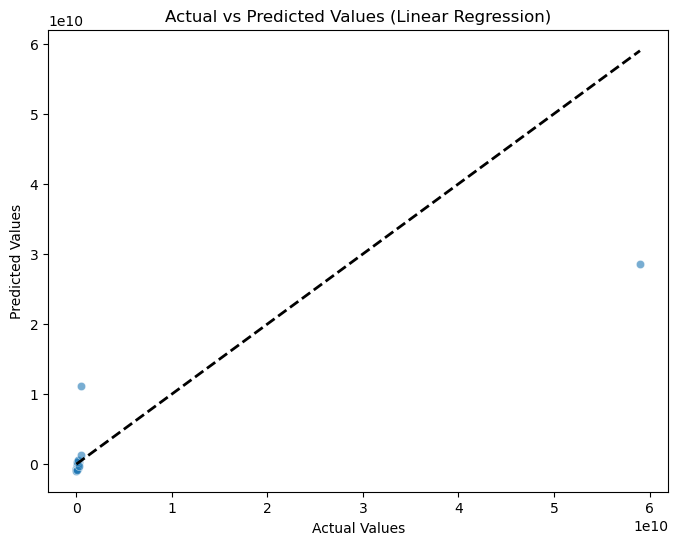

Random Forest - MAE: 2826792485.8095183, MSE: 1.0431745014087628e+20, RMSE: 10213591441.842398, R²: 0.24610362348022763


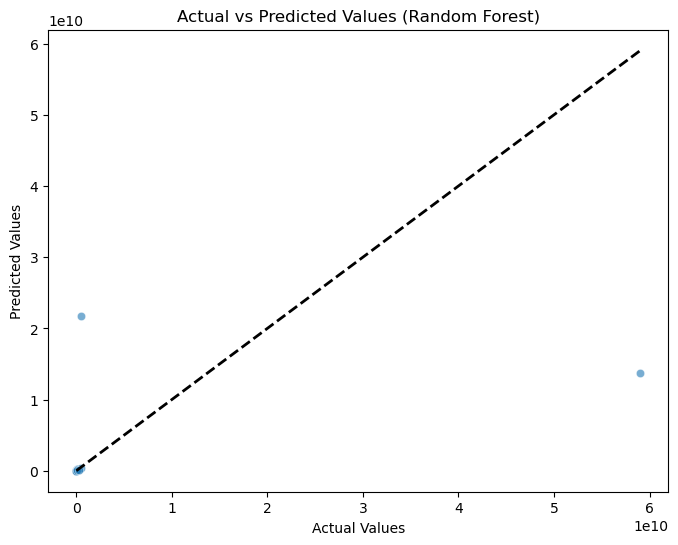

XGBoost - MAE: 815260391.3791667, MSE: 8.823254017657355e+18, RMSE: 2970396272.832525, R²: 0.9362348367982307


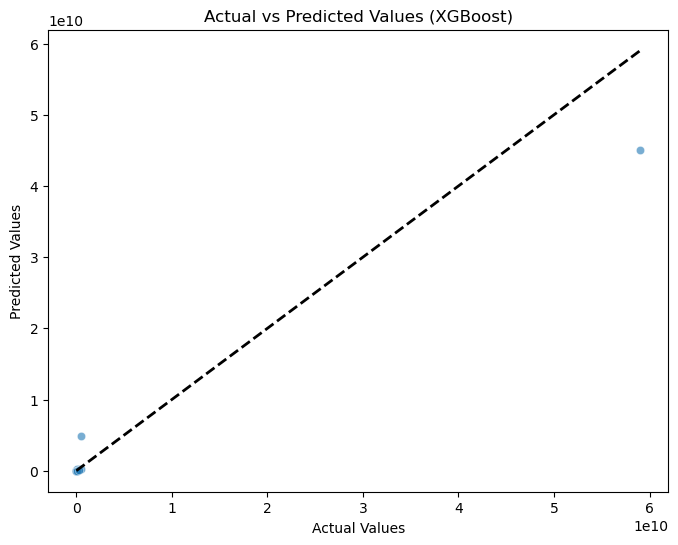

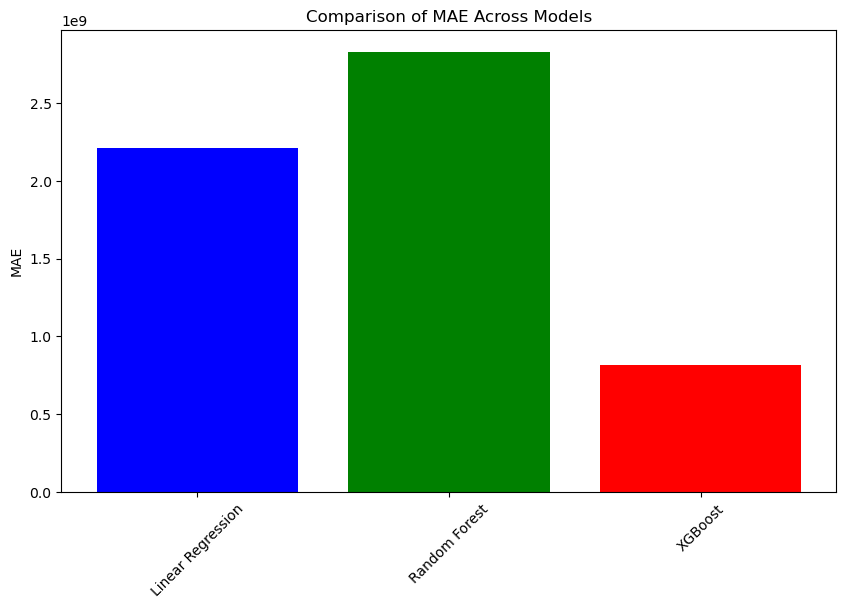

<Figure size 800x600 with 0 Axes>

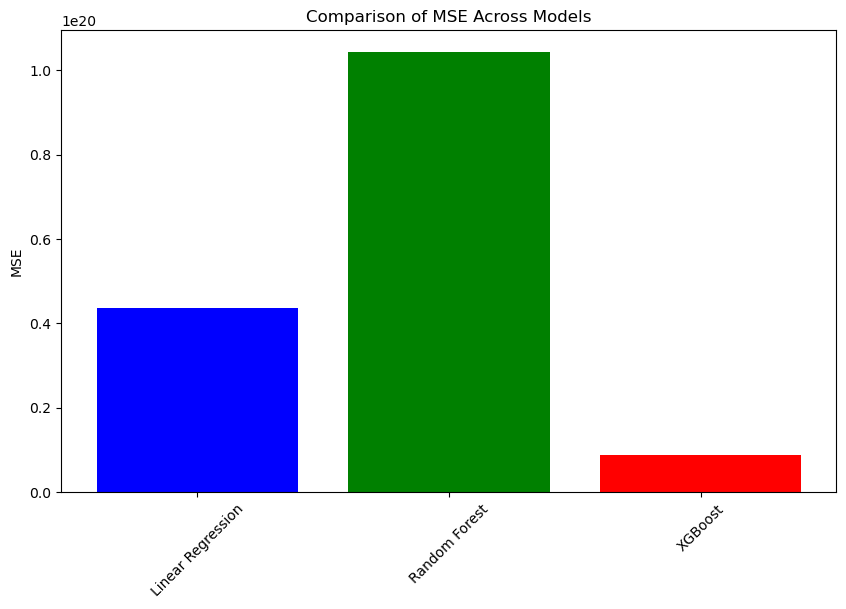

<Figure size 800x600 with 0 Axes>

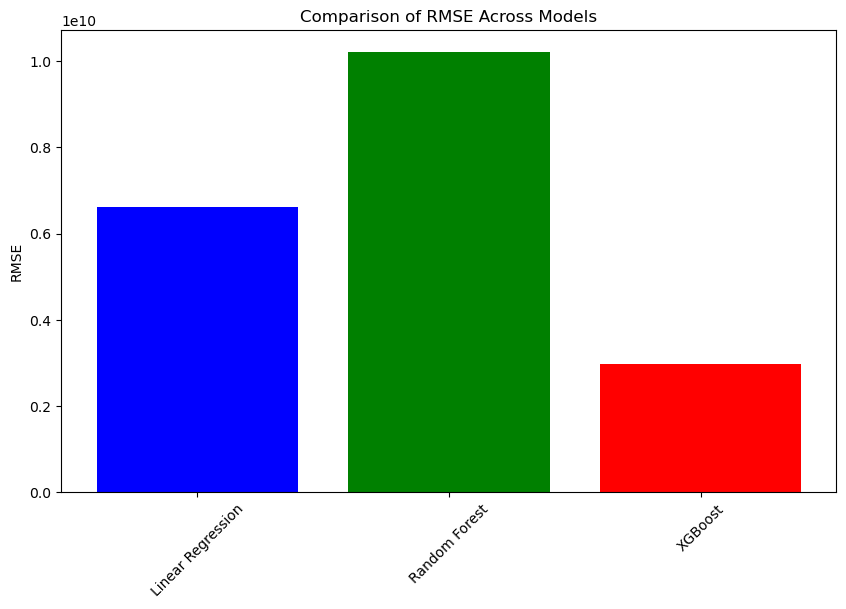

<Figure size 800x600 with 0 Axes>

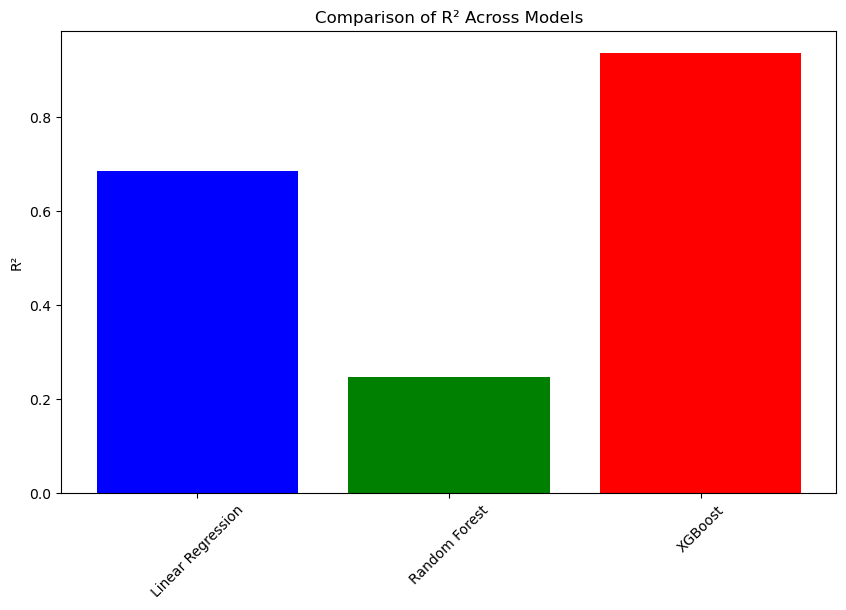

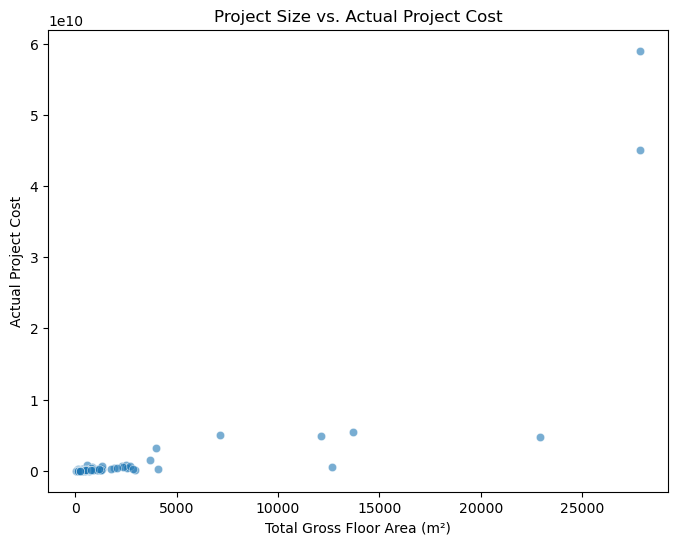

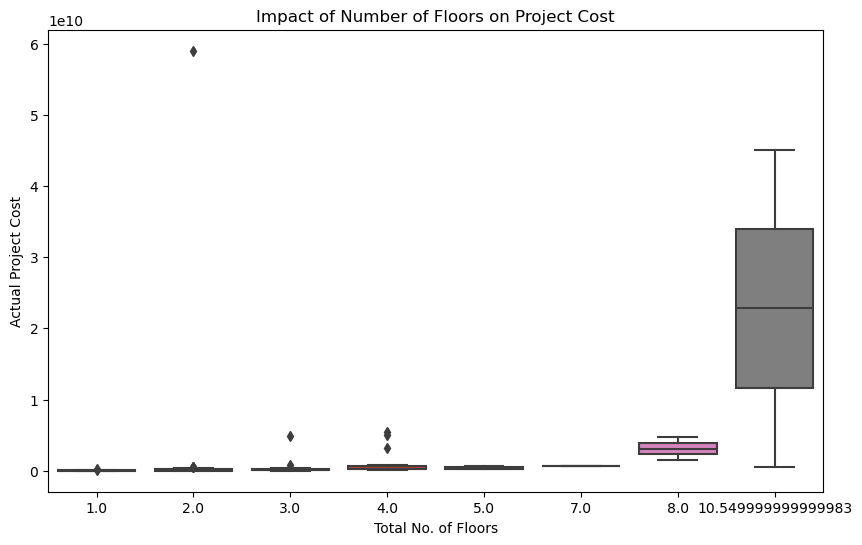

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "C:/Users/ADV_enture/Downloads/Collated_Construction_Information_2.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Selecting relevant features
features = ["Total Gross Floor Area(m2)", "Total No. of Floors", "Site Area(m2)"]
target = "Actual Project Cost at Completion"

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Handle outliers by capping them at the 99th percentile
def cap_outliers(series):
    upper_limit = series.quantile(0.99)
    return np.where(series > upper_limit, upper_limit, series)

df[features] = df[features].apply(cap_outliers)

# Fill missing values in features with median
df[features] = df[features].fillna(df[features].median())

# Data Visualization
plt.figure(figsize=(10,6))
sns.histplot(df[target], bins=30, kde=True)
plt.title("Distribution of Actual Project Cost at Completion")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

# Heatmap of Feature Correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Split data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}
    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

    # Scatter plot for Actual vs Predicted values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f"Actual vs Predicted Values ({name})")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

# Model Performance Comparison
metrics = ["MAE", "MSE", "RMSE", "R²"]
for metric in metrics:
    plt.figure(figsize=(10,6))
    values = [results[model][metric] for model in models]
    plt.bar(models.keys(), values, color=['blue', 'green', 'red'])
    plt.title(f"Comparison of {metric} Across Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Total Gross Floor Area(m2)"], y=df[target], alpha=0.6)
plt.title("Project Size vs. Actual Project Cost")
plt.xlabel("Total Gross Floor Area (m²)")
plt.ylabel("Actual Project Cost")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df["Total No. of Floors"], y=df[target])
plt.title("Impact of Number of Floors on Project Cost")
plt.xlabel("Total No. of Floors")
plt.ylabel("Actual Project Cost")
plt.show()
